In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats 
import sklearn.linear_model
import numpy as np 
import sklearn.neighbors


data = pd.read_csv(r"D:\Data analytics & Science\datasets\Project+1+-+Weather+Dataset.csv")



In [2]:
data

#provides displaying few coulmns
data.head

<bound method NDFrame.head of              Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Vis

In [3]:
#counting the number of rows and columns 
data.shape

(8784, 8)

In [4]:
#consise summary of the date frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
#aseessing the summary for statistical for numerical columns
data.describe

<bound method NDFrame.describe of              Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

     

In [6]:
#changinging date time format
data['Date/Time'].unique()

data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [8]:
#filtering column to identify unique values 

data['Temp_C'].unique()

array([ -1.8,  -1.5,  -1.4,  -1.3,  -1. ,  -0.5,  -0.2,   0.2,   0.8,
         1.8,   2.6,   3. ,   3.8,   3.1,   3.2,   4. ,   4.4,   5.3,
         5.2,   4.6,   3.9,   3.7,   2.9,   2.3,   2. ,   1.9,   1.5,
         2.2,   1.7,   1.1,   0. ,  -0.7,  -2.1,  -4.1,  -4.8,  -5.6,
        -5.8,  -7. ,  -7.4,  -9. ,  -9.7, -10.5, -11.3, -12.6, -12.9,
       -13.3, -14. , -14.8, -15. , -15.3, -14.9, -15.1, -15.8, -16.3,
       -16.9, -17.3, -17. , -17.1, -17.5, -17.9, -18.1, -18.5, -18.6,
       -18.2, -17.8, -16.8, -15.2, -14.2, -13.7, -12.4, -10.2,  -9.4,
        -8.9,  -8.4,  -7.8,  -7.6,  -9.5,  -9.6,  -8.8,  -7.5,  -5.4,
        -5. ,  -8.2,  -7.1,  -6.1,  -6.6,  -6. ,  -4.7,  -4.4,  -5.1,
        -4.3,  -6.7,  -9.2,  -9.8,  -9.9, -10. , -10.6, -11.8, -12. ,
       -14.4, -12.3, -12.5, -11.7, -11.9, -11.2, -11.5, -11.6,  -9.3,
        -8.7,  -8.5,  -8.1,  -6.9,  -6.4,  -5.7,  -5.5,  -3.7,  -3.6,
        -3.1,  -3.2,  -3. ,   0.4,   0.6,  -0.6,  -1.7,  -3.5,  -5.9,
        -6.5,  -7.2,

In [9]:
#filtering column to identify unique values 

data['Dew Point Temp_C'].unique()

array([ -3.9,  -3.7,  -3.4,  -3.2,  -3.3,  -3.1,  -3.6,  -2.3,  -2.1,
        -2. ,  -1.7,  -1.1,  -0.4,  -0.2,   0. ,   1. ,   1.3,   1.7,
         1.9,   2. ,   1.5,  -0.9,  -1.5,  -2.6,  -2.9,  -4.1,  -3.5,
        -6.2,  -6.5,  -6.8,  -7. ,  -8.7,  -9.5, -11.4, -12.1, -13.4,
       -12.8, -14.7, -14.1, -16. , -17.2, -15.8, -18.7, -20.1, -19.1,
       -19.3, -19.5, -21.3, -21.9, -22.2, -22.6, -22.4, -22.9, -23.2,
       -23.8, -24.8, -25.4, -24.6, -24.2, -24.1, -24. , -22.5, -20.6,
       -21.1, -21.7, -19. , -16.3, -15.5, -13.2, -12.6, -12.7, -11.6,
       -11.7, -10.2,  -8.3,  -7.7, -10.7,  -9.7,  -9.1, -10.1, -10. ,
        -9.6, -12. , -14.4, -15.4, -15.7, -14.8, -16.8, -17.3, -16.5,
       -16.1, -16.2, -16.7, -15.6, -14.3, -13.6, -13. , -12.5, -12.2,
       -11.1, -10.8, -10.5,  -9. ,  -8. ,  -7.8,  -7.2,  -6.9,  -6.1,
        -5.9,  -5.4,  -5.3,  -5. ,  -3. ,  -4.6,  -9.2, -10.3, -11.9,
       -12.4, -12.9, -13.3, -13.8, -13.9, -13.7, -14. , -14.5, -11. ,
        -6.6,  -5.8,

In [10]:
#filtering column to identify unique values 

data['Rel Hum_%'].unique()

array([ 86,  87,  89,  88,  85,  91,  82,  81,  84,  79,  77,  72,  71,
        69,  70,  68,  67,  66,  56,  57,  59,  55,  54,  58,  65,  53,
        60,  61,  63,  52,  50,  49,  62,  51,  75,  73,  80,  83,  76,
        64,  74,  78,  47,  90,  48,  45,  46,  92,  93,  42,  43,  40,
        39,  44,  94,  37,  41,  38,  96,  98,  99,  97,  95, 100,  29,
        28,  27,  19,  20,  18,  25,  26,  30,  24,  34,  33,  31,  32,
        35,  36,  21,  22,  23], dtype=int64)

In [11]:
#filtering column to identify unique values 

data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [12]:
data['Visibility_km'].unique()

array([ 8. ,  4. ,  4.8,  6.4,  1.2, 12.9, 16.1, 25. , 19.3, 24.1,  9.7,
       11.3, 48.3,  3.2,  2.8,  2.4,  2. ,  0.8,  0.6,  1. ,  1.6,  3.6,
        0.2,  0.4])

In [13]:
#filtering column to identify unique values 

data['Press_kPa'].unique()


array([101.24, 101.26, 101.27, 101.23, 101.29, 101.2 , 101.15, 100.98,
       100.79, 100.58, 100.31, 100.07,  99.93,  99.81,  99.74,  99.68,
        99.5 ,  99.39,  99.32,  99.31,  99.26,  99.3 ,  99.21,  99.18,
        99.14,  99.19,  99.27,  99.33,  99.41,  99.66,  99.86, 100.  ,
       100.15, 100.26, 100.27, 100.35, 100.43, 100.53, 100.61, 100.68,
       100.76, 100.85, 100.95, 101.07, 101.33, 101.34, 101.38, 101.44,
       101.51, 101.58, 101.64, 101.74, 101.82, 101.86, 101.87, 101.88,
       101.89, 101.77, 101.75, 101.73, 101.68, 101.54, 101.41, 101.25,
       100.97, 100.89, 100.69, 100.65, 100.54, 100.5 , 100.42, 100.32,
       100.29, 100.28, 100.24, 100.21, 100.19, 100.39, 100.45, 100.41,
       100.38, 100.4 , 100.46, 100.52, 100.6 , 100.71, 100.8 , 100.83,
       100.81, 100.84, 100.7 , 100.51, 100.47, 100.36, 100.23, 100.13,
       100.06, 100.1 , 100.12, 100.16, 100.11, 100.08, 100.05, 100.09,
       100.33, 100.48, 100.62, 100.72, 101.13, 101.21, 101.47, 101.59,
      

In [14]:
#filtering column to identify unique values 
data['Weather'].unique()

def categorize_weather(condition):
    if 'Rain' in condition or 'Drizzle' in condition:
        return 'Rainy'
    elif 'Clear' in condition:
        return 'Sunny'
    elif 'Thunderstorms' in condition:
        return 'Thunderstorms'
    else:
        return 'Cloudy'

# Apply the function to create a new column
data['weather condition'] = data['Weather'].apply(categorize_weather)
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,weather condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Cloudy
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Cloudy
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Rainy
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Rainy
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Cloudy
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,Cloudy
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,Cloudy
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Cloudy
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Cloudy


data['weather_category'].unique()

In [15]:
#countuing for missing values 
data.isna().sum()

Date/Time            0
Temp_C               0
Dew Point Temp_C     0
Rel Hum_%            0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather              0
weather condition    0
dtype: int64

In [16]:
#checking for duplicates in datasets 
data.duplicated().sum()

0

In [17]:
data.dropna()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,weather condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Cloudy
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Cloudy
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Rainy
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Rainy
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Cloudy
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,Cloudy
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,Cloudy
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Cloudy
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Cloudy


In [18]:
#keping first of duplicates
data= data.drop_duplicates(keep='first')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          8784 non-null   datetime64[ns]
 1   Temp_C             8784 non-null   float64       
 2   Dew Point Temp_C   8784 non-null   float64       
 3   Rel Hum_%          8784 non-null   int64         
 4   Wind Speed_km/h    8784 non-null   int64         
 5   Visibility_km      8784 non-null   float64       
 6   Press_kPa          8784 non-null   float64       
 7   Weather            8784 non-null   object        
 8   weather condition  8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 617.8+ KB


In [20]:
#spliting date/time column 
data['Year'] = data['Date/Time'].dt.year
data['Date'] = data['Date/Time'].dt.date
data['Time'] = data['Date/Time'].dt.time
data['Month'] = data['Date/Time'].dt.month_name()
data['Days'] = data['Date/Time'].dt.day_name()
data['Quarter'] = data['Date/Time'].dt.to_period('Q').map(str)




In [21]:
#renaiming weather category as weather condition
data.rename(columns={'weather_category':'Weather Condition'}, inplace=True)


In [22]:
Monthly_data= len(data[(data["Month"]=="January")& (data["weather condition"]=="Cloudy")])
print(Monthly_data)
total_Days = len(data) 
prob = (Monthly_data/total_Days)*100

print("The probability of having cloudy weather in january is:{0:.2f}%".format(prob))

501
The probability of having cloudy weather in january is:5.70%


In [23]:
#Probability of having Rains in the !st Quarter of the Year

Rains_in_1st_quarter = len(data[(data["Quarter"]=="2012Q1") & (data["weather condition"]=="Rainy")])
print(Rains_in_1st_quarter)

number_of_days = len(data)
proba= (Rains_in_1st_quarter/number_of_days)
print("Probability of having Rainy Days in the 1st Quarter is:{0:.2f}%".format(proba))

150
Probability of having Rainy Days in the 1st Quarter is:0.02%


In [24]:
weather_data = data["weather condition"].value_counts()
print(weather_data)

weather condition
Cloudy           4495
Sunny            3432
Rainy             855
Thunderstorms       2
Name: count, dtype: int64


In [25]:
#PROBABILITY THAT IT WILL RAIN 
total_days = len(data)
rainy_days= len(data[data["weather condition"]=="Rainy"])

probability = rainy_days/total_days
print("probability that it will rain:{0:.2f}%".format(probability*100))


probability that it will rain:9.73%


In [26]:
#Probability that it will rain on monday
days_probability = len(data[data["Days"]=="Monday"])
Total_Days = len(data)
print(Total_Days)
monday_probability = (days_probability / Total_Days)*100
monday_probability = round(monday_probability, 2)

print("The Probability That it will rain on Monday:{0:.2f}%".format(monday_probability))

8784
The Probability That it will rain on Monday:14.48%


In [27]:
quarter_prob = data["Quarter"].value_counts()
print(quarter_prob)

Quarter
2012Q3    2208
2012Q4    2208
2012Q1    2184
2012Q2    2184
Name: count, dtype: int64


In [28]:
Temp_zscores = stats.zscore(data['Temp_C'])
print(Temp_zscores)

0      -0.906815
1      -0.906815
2      -0.906815
3      -0.881146
4      -0.881146
          ...   
8779   -0.744244
8780   -0.735688
8781   -0.795582
8782   -0.769913
8783   -0.752801
Name: Temp_C, Length: 8784, dtype: float64


In [29]:
data.plot(kind ='line', x ='Temp_C', y = 'Temp_zscores' )
plt.show

KeyError: 'Temp_zscores'

In [ ]:
#temperature trend over time 

temperature_trend_over_time = data.pivot_table(
    index= ['Year','Month'],
    values= 'Temp_C',
    aggfunc= 'max'
).sort_values(by ='Temp_C', ascending = True).reset_index()
temperature_trend_over_time


,Year,Month,Temp_C
0,2012,January,5.3
1,2012,February,6.1
2,2012,December,11.9
3,2012,November,17.5
4,2012,October,21.1
5,2012,March,25.5
6,2012,April,27.8
7,2012,September,28.4
8,2012,May,31.2
9,2012,August,32.8


In [ ]:
temperature_range = data["Temp_C"].max()-data["Temp_C"].min()
print(temperature_range)

variance = data["Temp_C"].var()
print(variance)

standard_devation= data["Temp_C"].std()
print(standard_devation)

56.3
136.6066036380462
11.687882769691276


In [ ]:
weather_map = {'sunny':1,'Cloudy':2,'Rainy':3,'Snow':4}
data["weather_num"]= data["Weather"].map(weather_map)

correlation_coefficient = data["Temp_C"].corr(data["weather_num"])
print(correlation_coefficient)

-0.4326533533375969


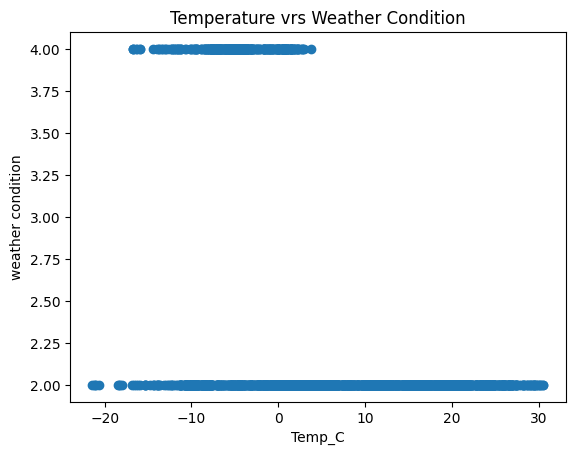

In [ ]:
plt.scatter(data["Temp_C"],data["weather_num"])
plt.xlabel("Temp_C")
plt.ylabel("weather condition")
plt.title("Temperature vrs Weather Condition")
plt.show()

In [ ]:
fig = px.bar(
   temperature_trend_over_time,
    x= 'Month',
    y= 'Temp_C',
    color ='Year',
    hover_name='Year',
    title=' MAXIMUM TEMPERATURE OVER A MONTH PERIOD',
    labels={'Temp_C':'Temperature'}
)
fig.update_layout(showlegend=True,yaxis_tickprefix='celcius ',yaxis_tickformat=',.2f')
fig.show()

In [ ]:
#temperature trends over a quarter period of the year
quarterly_temperature_trend = data.pivot_table(
    index = ['Year','Quarter'],
    values='Temp_C',
    aggfunc= 'mean',
).sort_values(by = 'Temp_C', ascending=True).reset_index()
quarterly_temperature_trend

,Year,Quarter,Temp_C
0,2012,2012Q1,-2.794322
1,2012,2012Q4,2.880978
2,2012,2012Q2,14.479899
3,2012,2012Q3,20.561775


In [ ]:
fig=px.bar(
    quarterly_temperature_trend,
    x = 'Quarter',
    y= 'Temp_C',
    color='Year',
    hover_name='Year',
    title='AVERAGE QUARTERLY TEMPERATURE TREND',
    labels={'Temp_C':'Temperatures'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='celcius',yaxis_tickformat=',.2f')

In [ ]:
temperature_trend_against_Weather_Condition = data.pivot_table(
    index= ['weather condition','Year'],
    values= 'Temp_C',
    aggfunc= 'median'
).sort_values(by ='Temp_C', ascending = True).reset_index()
temperature_trend_against_Weather_Condition


,weather condition,Year,Temp_C
0,Cloudy,2012,6.60
1,Rainy,2012,8.40
2,Sunny,2012,13.10
3,Thunderstorms,2012,24.15


In [ ]:
fig=px.bar(
 temperature_trend_against_Weather_Condition,
    x = 'Weather Condition',
    y= 'Temp_C',
    color='Weather Condition',
    hover_name='Year',
    title='Average Temperature against Weather Condition',
    labels={'Temp_C':'Temperatures'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='celcius',yaxis_tickformat=',.2f')

In [ ]:
Max_temperature_trend_against_Weather_Condition_Quarterly = data.pivot_table(
    index= ['Quarter','Weather Condition'],
    values= 'Temp_C',
    aggfunc= 'max',
    
).sort_values(by ='Temp_C', ascending = True).reset_index()
Max_temperature_trend_against_Weather_Condition_Quarterly


,Quarter,Weather Condition,Temp_C
0,2012Q1,Rainy,18.2
1,2012Q4,Rainy,18.9
2,2012Q4,Cloudy,20.7
3,2012Q4,Sunny,21.1
4,2012Q1,Cloudy,23.3
5,2012Q1,Sunny,25.5
6,2012Q3,Rainy,26.3
7,2012Q2,Rainy,26.4
8,2012Q3,Thunderstorms,26.7
9,2012Q3,Cloudy,32.2


In [ ]:
fig=px.bar(
 Max_temperature_trend_against_Weather_Condition_Quarterly,
    x = 'Quarter',
    y= 'Temp_C',
    color='Weather Condition',
    hover_name='Weather Condition',
    title='Quarterly Maximmum Temperature ',
    labels={'Temp_C':'Temperatures'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='celcius',yaxis_tickformat=',.2f')

In [ ]:
fig=px.bar(
dew_point_and_humidity_relation,
    x = 'Month',
    y= 'Rel Hum_%',
    color='Rel Hum_%',
    hover_name='Year',
    title='Realative Humidity over a Mean period',
    labels={'Temp_C':'Temperatures'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='celcius',yaxis_tickformat=',.2f')

NameError: name 'dew_point_and_humidity_relation' is not defined

In [ ]:
#low visibility pose hazards on roads, air and maritime.

In [ ]:
Visibility_against_Weather_conditions= data.pivot_table(
    index = 'Weather Condition',
    values='Visibility_km',
    aggfunc='mean',
).sort_values(by ='Visibility_km', ascending =True).reset_index()
Visibility_against_Weather_conditions

KeyError: 'Weather Condition'

In [ ]:
fig=px.bar(
Visibility_against_Weather_conditions,
    x = 'Weather Condition',
    y= 'Visibility_km',
    color='Weather Condition',
    hover_name='Visibility_km',
    title='Visibility Trend Against the various weather Conditions',
    labels={'Weather Condition':'Visibility_km'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='km',yaxis_tickformat=',.2f')

In [ ]:
Visibility_against_various_Months= data.pivot_table(
    index = 'Month',
    values='Visibility_km',
    aggfunc='mean',
).sort_values(by ='Visibility_km', ascending =True).reset_index()
Visibility_against_various_Months

,Month,Visibility_km
0,December,19.733199
1,January,22.100269
2,October,25.111022
3,February,25.182184
4,November,26.077083
5,March,26.177957
6,May,29.418548
7,August,30.192608
8,September,30.603472
9,April,31.777083


In [ ]:
fig=px.scatter(
Visibility_against_various_Months,
    x = 'Month',
    y= 'Visibility_km',
    color='Month',
    hover_name='Visibility_km',
    title='Visibility Trend Against the various weather Conditions',
    labels={'Month':'Visibility_km'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='km',yaxis_tickformat=',.2f')

In [ ]:
 Wind_against_Month= data.pivot_table(
    index = 'Month',
    values='Wind Speed_km/h',
    aggfunc='mean',
).sort_values(by ='Wind Speed_km/h', ascending =True).reset_index()
Wind_against_Month

,Month,Wind Speed_km/h
0,July,11.887097
1,May,12.846774
2,August,13.931452
3,November,13.973611
4,September,14.108333
5,March,14.514785
6,June,14.681944
7,February,14.837644
8,October,15.475806
9,April,17.369444


In [ ]:
fig=px.bar(
Wind_against_Month,
    x = 'Month',
    y= 'Wind Speed_km/h',
    color='Month',
    hover_name='Wind Speed_km/h',
    title='Wind speed ober a month period',
    labels={'Month':'Wind Speed_km/h'}
)
fig.update_layout(showlegend = True,yaxis_tickprefix ='km',yaxis_tickformat=',.2f')

In [ ]:
Atmospheric_pressure_and_weather_condition= data.pivot_table(
    index= 'Weather Condition',
    values= ['Press_kPa','Month'],
    aggfunc= 'max',
    
).sort_values(by ='Press_kPa', ascending = True).reset_index()
Atmospheric_pressure_and_weather_condition


,Weather Condition,Month,Press_kPa
0,Thunderstorms,July,100.62
1,Rainy,September,102.31
2,Sunny,September,103.63
3,Cloudy,September,103.65


In [ ]:
fig = px.pie(
    Atmospheric_pressure_and_weather_condition,
    values='Press_kPa',
    names='Weather Condition',
    title= 'chart representing max pressure againt the various Weather Conditions')
fig.show()
    

In [ ]:
Pressure_vrs_weather_in_month= data.pivot_table(
    index= 'Weather Condition',
    values= ['Month','Press_kPa'],
    aggfunc= 'min',
    
).sort_values(by ='Press_kPa', ascending = True).reset_index()
Pressure_vrs_weather_in_month


,Weather Condition,Month,Press_kPa
0,Rainy,April,97.52
1,Cloudy,April,97.75
2,Sunny,April,98.67
3,Thunderstorms,July,99.84


In [ ]:
fig = px.pie(
   Pressure_vrs_weather_in_month,
    values='Press_kPa',
    names='Weather Condition',
    title= 'chart representing Minimum pressure againt the various Weather Conditions')
fig.show()

In [ ]:
Pressure_vrs_weather_in_various_quarter= data.pivot_table(
    index= 'Quarter',
    values= ['Weather Condition','Press_kPa'],
    aggfunc= 'max',
    
).sort_values(by ='Press_kPa', ascending = True).reset_index()
Pressure_vrs_weather_in_various_quarter

,Quarter,Press_kPa,Weather Condition
0,2012Q3,102.10,Thunderstorms
1,2012Q2,102.44,Sunny
2,2012Q1,103.12,Sunny
3,2012Q4,103.65,Sunny


In [ ]:
fig = px.pie(
   Pressure_vrs_weather_in_various_quarter,
    values='Press_kPa',
    names='Quarter',
    title= 'chart representing max pressure againt the various Weather Conditions')
fig.show()

machine learning codes

In [ ]:
# import data
# prepare the data
# visualise the data
# select the model
# train the model 
# make predictions 

In [ ]:
x = np.c_[data["Rel Hum_%"]]
y= np.c_[data["Temp_C"]]

<Axes: >

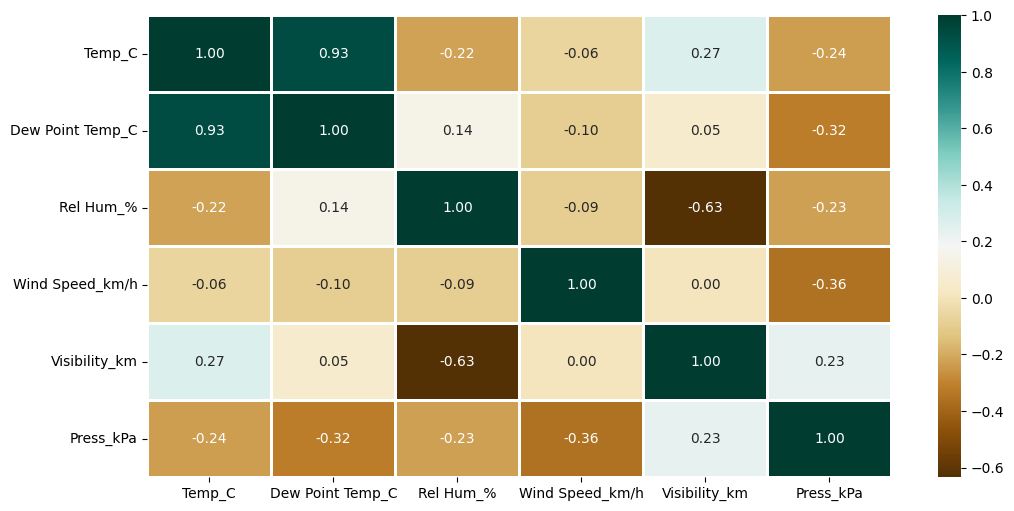

In [ ]:
numerical_dataset = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [ ]:
model = sklearn.linear_model.LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
X_new = [[-1.8]]  
print(model.predict(X_new))

[[19.32868862]]


In [ ]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [ ]:
model.fit(x, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
import sklearn.linear_model

In [ ]:
x =np.c_[data["Rel Hum_%"]]
y= np.c_[data["Temp_C"]]


<function matplotlib.pyplot.show(close=None, block=None)>

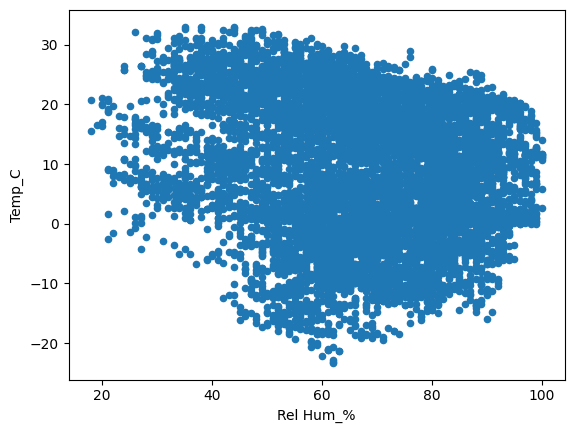

In [ ]:
data.plot(kind="scatter", x="Rel Hum_%", y= "Temp_C")
plt.show

In [ ]:
model= sklearn.linear_model.LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()